## **Sentiment Analysis**  

Sentiment analysis is a text classification method which helps us to classify the sentiment of a text as either positive, neutral or negative. I will use a couple of python libraries to analyse the sentiments of both the fake and real news articles from my dataset.

In [12]:
import pandas as pd
import re
from textblob import TextBlob
import warnings
from nltk.sentiment.vader import SentimentIntensityAnalyzer
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 

In [2]:
news_df = pd.read_csv('news_df_cleaned.csv')
fake_df = news_df[news_df['classification'] == 'fake']
real_df = news_df[news_df['classification'] == 'real']

## **Textblob**

Textblob is a library we can use for NLP and sentiment analysis. When applied to a text, textblob returns a polarity and subjectivity score. 
- Polarity returns a value between the range [-1.0 to 1.0] where 0 indicates neutral, +1 indicates a very positive sentiment and -1 represents a very negative sentiment. 
- Subjectivity returns a value between [0.0 to 1.0] where 0.0 indicates high objectivity and 1.0 indicates high subjectivity in the sentiment.   

The library has been pretrained on data from the pattern and NLTK python libary so we can directly apply the textblob function to our fake and real news and see how the sentiments behind fake and real news differ.

In [3]:
TextBlob(fake_df.iloc[9]['text']).sentiment.subjectivity

0.5424242424242425

In [3]:
# this function will return the polarity score for a given text

def detect_polarity(text):
    
    return TextBlob(text).sentiment.polarity


In [4]:
# this function will return the subjectivity score for a given text

def detect_subjectivity(text):

    return TextBlob(text).sentiment.subjectivity

In [5]:
fake_df['text_polarity'] = fake_df['text'].apply(detect_polarity)
fake_df['text_subjectivity'] = fake_df['text'].apply(detect_subjectivity)
fake_df['headline_polarity'] = fake_df['headline'].apply(detect_polarity)
fake_df['headline_subjectivity'] = fake_df['headline'].apply(detect_subjectivity)

In [6]:
real_df['text_polarity'] = real_df['text'].astype(str).apply(detect_polarity)
real_df['text_subjectivity'] = real_df['text'].astype(str).apply(detect_subjectivity)
real_df['headline_polarity'] = real_df['headline'].astype(str).apply(detect_polarity)
real_df['headline_subjectivity'] = real_df['headline'].astype(str).apply(detect_subjectivity)

In [8]:
fake_df['text_polarity'].mean(), fake_df['text_subjectivity'].mean(), fake_df['headline_polarity'].mean(), fake_df['headline_subjectivity'].mean()


(0.07367517398329139,
 0.42569596256172154,
 0.019457859816495216,
 0.25873240841565953)

The average polarity for the fake news headlines and text is close to 0 indicating a neutral sentiment. The average subjectivity for the text is 0.42 which also indicates the sentiments are on average realatively neutral. The fake news headlines are interestingly slightly more objective than the texts.

In [10]:
real_df['text_polarity'].mean(), real_df['text_subjectivity'].mean(), real_df['headline_polarity'].mean(), real_df['headline_subjectivity'].mean()

(0.044412120078484434,
 0.3510032553142782,
 0.01582969998842004,
 0.181132857746566)

The average polarity for the real news is also close to 0 indicating a neutral sentiment. The subjectivity is 0.35, meaning the real news is unsurprisingly on average slightly more objective then the fake news. The headline subjectivity is also more objective than that of the fake news with a value of 0.18 compared to 0.25.

In [43]:
def plot_hist(column, x_label, title):

    num_bins = 50
    plt.figure(figsize=(10,6))
    n, bins, patches = plt.hist(column, num_bins, facecolor='blue', alpha=0.5)
    plt.xlabel(x_label)
    #plt.ylabel(y_label)
    plt.title(title)
    plt.show()

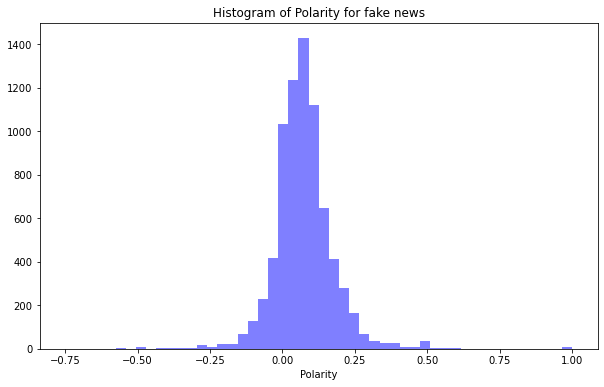

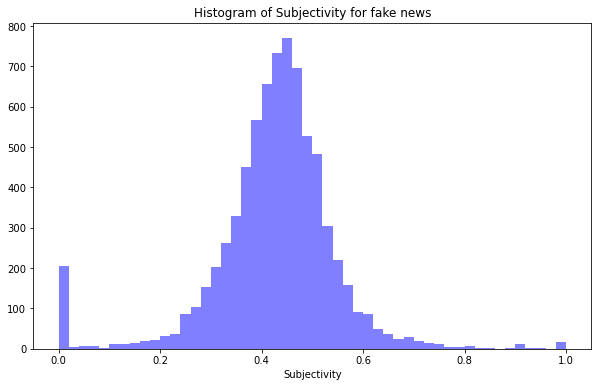

(None, None)

In [50]:
plot_hist(fake_df['polarity'], 'Polarity', 'Histogram of Polarity for fake news'), plot_hist(fake_df['subjectivity'], 'Subjectivity', 'Histogram of Subjectivity for fake news')

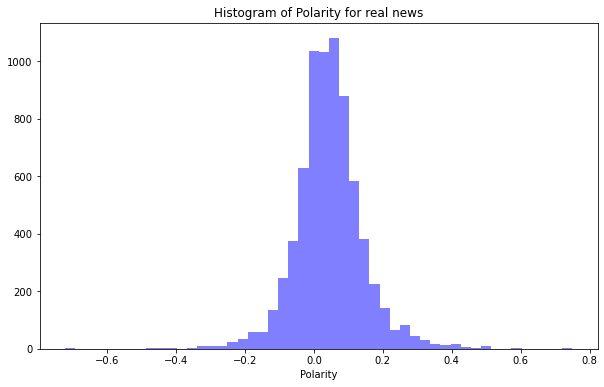

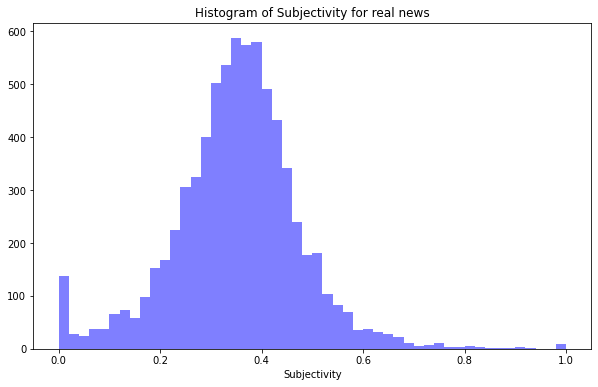

(None, None)

In [51]:
plot_hist(real_df['polarity'], 'Polarity', 'Histogram of Polarity for real news'), plot_hist(real_df['subjectivity'], 'Subjectivity', 'Histogram of Subjectivity for real news')

In [61]:
# here are some examples of the text with the highest polarity score (meaning the algorithm classified the text as highly positive)

fake_df['text'][fake_df['polarity'] == 1]

7293       Don’t ask Thom Yorke to write a cover quote ...
7730     jewsnews © 2015 | JEWSNEWS | It's not news...u...
7740     jewsnews © 2015 | JEWSNEWS | It's not news...u...
11971    jewsnews © 2015 | JEWSNEWS | It's not news...u...
13506    Thank you for being a faggot USA is proud of y...
13772    jewsnews © 2015 | JEWSNEWS | It's not news...u...
14533    The holiday season is just around the corner a...
14534    jewsnews © 2015 | JEWSNEWS | It's not news...u...
Name: text, dtype: object

In [58]:
fake_df['text'][13506]

'Thank you for being a faggot USA is proud of you! 10/13/16 2 09/12/16 3 05/26/16 4 09/02/15 9 Mail with questions or comments about this site. "Godlike Productions" & "GLP" are registered trademarks of Zero Point Ltd. Godlike™ © 1999  2015 Godlikeproductions.com Page generated in 0.008s (8 queries)'

The above example was given a polarity score of one. However I wouldn't neccessarily classify this text as being positive as it misses the potential sarcasm behind the sentiment. 

In [67]:
# max postive score for the real news is 0.75

real_df['polarity'].max()

0.75

In [66]:
real_df['text'][real_df['polarity'] == 0.75]

6794    The Democraticcontrolled House of Representati...
6911     Tim and Kristy Turner believe they were calle...
Name: text, dtype: object

In [69]:
real_df['text'][6794]

'The Democraticcontrolled House of Representatives on Thursday passed its version of a $768 billion defense policy bill for the 2022 fiscal year. The vote was 316 to 113 in favor of the\xa0National Defense Authorization Act, or NDAA, which sets policy for the Pentagon on a number of areas including from how many rifles and ships it should purchase to soldiers’ salaries to how best to approach geopolitical threats. The annual defense authorization bill, which still needs to be negotiated with the Senate, directs the Pentagon to outline how it will...'

The above example is an exmaple of a text classified as being highly postive by the algorithm. However I'm not so sure, I would say it's a more neutral statement. 

In [71]:
# lets take a look at the highest subjectivity scores

fake_df['subjectivity'].max()

1.0

In [73]:
fake_df['text'][fake_df['subjectivity'] == 1]

7730     jewsnews © 2015 | JEWSNEWS | It's not news...u...
7740     jewsnews © 2015 | JEWSNEWS | It's not news...u...
7939     VIDEO : Dinesh D’Souza Delivers Powerful #Elec...
9481     Paula Jones Calls Megyn Kelly A ‘Nasty Heifer’...
9677     Election Results Confirmed Via: Bloomberg , Go...
10983    Chart Of The Day: In Lieu Of Growth, The Tech ...
11243    Those who follow news shared by alternative me...
11578      This Times newspaper correction is amusing  ...
11913    Once again, the repression of those against th...
11964    Chart of The Day: Massive Asset Deflation Ahead  
11971    jewsnews © 2015 | JEWSNEWS | It's not news...u...
13473    Mike Pence's Plane Slides off Runway at LaGuar...
13506    Thank you for being a faggot USA is proud of y...
13772    jewsnews © 2015 | JEWSNEWS | It's not news...u...
14286                                    Nice Admin Lady  
14533    The holiday season is just around the corner a...
14534    jewsnews © 2015 | JEWSNEWS | It's not news...u.

In [74]:
fake_df['text'][9481]

'Paula Jones Calls Megyn Kelly A ‘Nasty Heifer’ After Contentious Interview With Gingrich [VIDEO]    “Woohoo, he slammed this nasty heifer!” Jones said of Gingrich in a tweet she has since deleted but is screen captured below.  Jones immediately caught flak from Twitter users for calling Kelly a name. @megmcsweeney wrong….she only believes the so called trump victims….hypocrite!'

Here is an example of a text classified as being highly subjective by the algorithm. This is again a tough one to classify as is it text which quotes someone elct. The quoted sentiment is highly subjective however that doesn't mean the news article itself is. 

In [75]:
real_df['subjectivity'].max()

1.0

In [76]:
real_df['text'][real_df['subjectivity'] == 1]

180       The leader of Catalonia s government called ...
3189      Iceland s prime minister said on Saturday th...
3406      The United States has asked China to cut off...
5129    GLASGOW, Nov 6 (Thomson Reuters Foundation)  F...
5165      Estee Lauder Cos Inc (EL.N) cut its fullyear...
5231      The U.S. State Department on Thursday announ...
5237      The U.S. Environmental Protection Agency has...
5278      The U.S. embassy in Addis Ababa advised all ...
6199    The director of the US Centers for Disease Con...
7015    Do Republican leaders still think their only p...
Name: text, dtype: object

In [77]:
real_df['text'][5231]

'  The U.S. State Department on Thursday announced a reward of up to $10 million for information leading to the identification or location of anyone with a key leadership position in DarkSide, a cybercrime organization the FBI has said is based in Russia.'

In [78]:
real_df['text'][6199]

'The director of the US Centers for Disease Control and Prevention, Dr. Rochelle Walensky, said Tuesday evening she was endorsing a recommendation for vaccinating children ages 511 against Covid19, clearing the way for immediate vaccination of the youngest age group yet in the United States. “CDC now expands vaccine recommendations to about 28 million children in the United States\xa0in this age group and\xa0allows\xa0providers\xa0to\xa0begin vaccinating\xa0them as soon as\xa0possible,” the agency said in a statement. “Together, with science leading the charge, we have taken\xa0another important step\xa0forward\xa0in our nation’s fight against the virus...'

Here are 2 examples of real news texts classified as being highly subjective. However I would say it's again questionable whether they are subjective. The first one seems plainly objective to me and the second has a quote in it which is subjective, but that does not mean that the article itself is subjective.

### **Conclusion**

The algorithm from textblob has given us some interesting results. However as the above examples show I would not rely on this algorithm to accurately classify the sentiments from our real and fakes news datasets as it does not seem to pick up on subtleties in texts such as sarcasm or quotes from other people mentioned in the text.

## **Vader**

Lets try now with the vader algorithm. This is especially attuned to sentiments from social media so could work better on the fake news than textblob. The vader algorithm returns 4 values:
- pos: The probability of the sentiment to be positive
- neu: The probability of the sentiment to be neutral
- neg: The probability of the sentiment to be negative
- compound: The normalized compound score which calculates the sum of all lexicon ratings and takes values from -1 to 1  

The typical threshold values are as follows:
- positive: compound score>=0.05
- neutral: compound score between -0.05 and 0.05
- negative: compound score<=-0.05  

Vader is also case sensitive and takes into account punctuation. This means we can use it on the non cleaned data.

In [14]:
import nltk
analyzer = SentimentIntensityAnalyzer()

In [15]:
analyzer.polarity_scores(fake_df.iloc[9]['text'])

{'neg': 0.088, 'neu': 0.788, 'pos': 0.124, 'compound': 0.7196}

In [18]:
news_df['neg_text'] = news_df['text'].apply(lambda x:analyzer.polarity_scores(str(x))['neg'])
news_df['neu_text'] = news_df['text'].apply(lambda x:analyzer.polarity_scores(str(x))['neu'])
news_df['pos_text'] = news_df['text'].apply(lambda x:analyzer.polarity_scores(str(x))['pos'])
news_df['compound_text'] = news_df['text'].apply(lambda x:analyzer.polarity_scores(str(x))['compound'])
news_df['neg_headline'] = news_df['headline'].apply(lambda x:analyzer.polarity_scores(str(x))['neg'])
news_df['neu_headline'] = news_df['headline'].apply(lambda x:analyzer.polarity_scores(str(x))['neu'])
news_df['pos_headline'] = news_df['headline'].apply(lambda x:analyzer.polarity_scores(str(x))['pos'])
news_df['compound_headline'] = news_df['headline'].apply(lambda x:analyzer.polarity_scores(str(x))['compound'])
news_df


,headline,text,classification,text_cleaned,text_transformed,headline_cleaned,headline_transformed,headline_text_merged,neg_text,neu_text,pos_text,compound_text,neg_headline,neu_headline,pos_headline,compound_headline
0,Tillerson to visit Africa in first quarter of ...,U.S. Secretary of State Rex Tillerson is pla...,real,u s secretary of state rex tillerson is plann...,u secretary state rex tillerson planning trip ...,tillerson to visit africa in first quarter of ...,tillerson visit africa first quarter adviser,tillerson visit africa first quarter adviser u...,0.035,0.919,0.046,0.2732,0.000,1.000,0.000,0.0000
1,Swedish court sentences Syrian asylum seeker t...,A Swedish court on Monday sentenced a Syrian...,real,a swedish court on monday sentenced a syrian ...,swedish court monday sentenced syrian asylum s...,swedish court sentences syrian asylum seeker t...,swedish court sentence syrian asylum seeker pr...,swedish court sentence syrian asylum seeker pr...,0.280,0.678,0.042,-0.9884,0.530,0.415,0.055,-0.9062
2,Irish election likely after opposition submits...,An Irish general election appeared likely af...,real,an irish general election appeared likely aft...,irish general election appeared likely opposit...,irish election likely after opposition submits...,irish election likely opposition submits confi...,irish election likely opposition submits confi...,0.173,0.582,0.245,0.7351,0.000,1.000,0.000,0.0000
3,Argentina blocks some activists from attending...,Argentina revoked the credentials of some ac...,real,argentina revoked the credentials of some act...,argentina revoked credential activist accredit...,argentina blocks some activists from attending...,argentina block activist attending wto meeting,argentina block activist attending wto meeting...,0.079,0.851,0.070,-0.3499,0.213,0.787,0.000,-0.2263
4,"Kremlin, after Kurdish vote, says supports int...",The Kremlin on Tuesday signaled its oppositi...,real,the kremlin on tuesday signaled its oppositio...,kremlin tuesday signaled opposition kurdishhel...,kremlin after kurdish vote says supports integ...,kremlin kurdish vote say support integrity reg...,kremlin kurdish vote say support integrity reg...,0.039,0.845,0.116,0.8271,0.000,0.611,0.389,0.6249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14757,Obama Said America Wants Him Back for a 3rd Te...,"Earlier this year, in a speech to the Africa...",fake,earlier this year in a speech to the african ...,earlier year speech african union ethiopia pre...,obama said america wants him back for a rd ter...,obama said america want back rd term america r...,obama said america want back rd term america r...,0.087,0.840,0.073,-0.8093,0.000,1.000,0.000,0.0000
14758,Spain To Review Permission For Syria Bound Rus...,"Carol Adl in News , World // 1 Comment Spai...",fake,carol adl in news world comment spain is havi...,carol adl news world comment spain review deci...,spain to review permission for syria bound rus...,spain review permission syria bound russian sh...,spain review permission syria bound russian sh...,0.072,0.865,0.063,-0.7584,0.000,1.000,0.000,0.0000
14759,Pakistan conducts training maneuvers at the bo...,This post was originally published on this sit...,fake,this post was originally published on this sit...,post originally published site riot caused pub...,pakistan conducts training maneuvers at the bo...,pakistan conduct training maneuver border indi...,pakistan conduct training maneuver border indi...,0.101,0.846,0.053,-0.9204,0.000,1.000,0.000,0.0000
14760,US In Danger of Losing Allies In Asia,Philippines President turning his country awa...,fake,philippines president turning his country awa...,philippine president turning country away u pi...,us in danger of losing allies in asia,u danger losing ally asia,u danger losing ally asia philippine president...,0.117,0.781,0.102,-0.3400,0.500,0.500,0.000,-0.7184


In [19]:
news_df[news_df['classification']== 'real'].compound_text.mean()

-0.09863004681905842

The mean compound score for real news text is -0.09 indicated the real news tends to be negative according to vader.

In [20]:
news_df[news_df['classification']== 'real'].compound_headline.mean()

-0.10650380060589362

The compund score for real news headlines is -0.1. That is also tending to be negative but bordering on neutrality.

In [21]:
news_df[news_df['classification']== 'fake'].compound_text.mean()

0.03243431999999987

The mean compound score for the fake news is 0.03 indicating the fake news tends to be neutral according to vader.

In [22]:
news_df[news_df['classification']== 'fake'].compound_headline.mean()

-0.1047552799999998

The mean score for the fake news headlines is -0.1, which is the same as the real news headlines.  

Overall we can't say there is much of a significant difference in sentiment between fake and real news based on the vader scores

In [23]:
# lets create a new column called 'label' and classify the texts
# i will use a threshold of > 0.2 = postive and < -0.2 = negative 

news_df['label'] = 'neutral'
news_df.loc[news_df['compound'] > 0.2, 'label'] = 'positive'
news_df.loc[news_df['compound'] < -0.2, 'label'] = 'negative'
news_df.head()

,headline,source,text,classification,text_cleaned,text_tokenized,text_removed_stopwords,text_lemmatized,headline_cleaned,headline_tokenized,headline_removed_stopwords,headline_lemmatized,neg,neu,pos,compound,label
0,Tillerson To Visit Africa In First Quarter Of ...,reuters,U.S. Secretary of State Rex Tillerson is pla...,real,u s secretary of state rex tillerson is plann...,"['u', 's', 'secretary', 'of', 'state', 'rex', ...","['u', 'secretary', 'state', 'rex', 'tillerson'...","['u', 'secretary', 'state', 'rex', 'tillerson'...",tillerson to visit africa in first quarter of ...,"['tillerson', 'to', 'visit', 'africa', 'in', '...","['tillerson', 'visit', 'africa', 'first', 'qua...","['tillerson', 'visit', 'africa', 'first', 'qua...",0.035,0.919,0.046,0.2732,positive
1,Swedish Court Sentences Syrian Asylum Seeker T...,reuters,A Swedish court on Monday sentenced a Syrian...,real,a swedish court on monday sentenced a syrian ...,"['a', 'swedish', 'court', 'on', 'monday', 'sen...","['swedish', 'court', 'monday', 'sentenced', 's...","['swedish', 'court', 'monday', 'sentenced', 's...",swedish court sentences syrian asylum seeker t...,"['swedish', 'court', 'sentences', 'syrian', 'a...","['swedish', 'court', 'sentences', 'syrian', 'a...","['swedish', 'court', 'sentence', 'syrian', 'as...",0.280,0.678,0.042,-0.9884,negative
2,Irish Election Likely After Opposition Submits...,reuters,An Irish general election appeared likely af...,real,an irish general election appeared likely aft...,"['an', 'irish', 'general', 'election', 'appear...","['irish', 'general', 'election', 'appeared', '...","['irish', 'general', 'election', 'appeared', '...",irish election likely after opposition submits...,"['irish', 'election', 'likely', 'after', 'oppo...","['irish', 'election', 'likely', 'opposition', ...","['irish', 'election', 'likely', 'opposition', ...",0.173,0.582,0.245,0.7351,positive
3,Argentina Blocks Some Activists From Attending...,reuters,Argentina revoked the credentials of some ac...,real,argentina revoked the credentials of some act...,"['argentina', 'revoked', 'the', 'credentials',...","['argentina', 'revoked', 'credentials', 'activ...","['argentina', 'revoked', 'credential', 'activi...",argentina blocks some activists from attending...,"['argentina', 'blocks', 'some', 'activists', '...","['argentina', 'blocks', 'activists', 'attendin...","['argentina', 'block', 'activist', 'attending'...",0.079,0.851,0.070,-0.3499,negative
4,"Kremlin, After Kurdish Vote, Says Supports Int...",reuters,The Kremlin on Tuesday signaled its oppositi...,real,the kremlin on tuesday signaled its oppositio...,"['the', 'kremlin', 'on', 'tuesday', 'signaled'...","['kremlin', 'tuesday', 'signaled', 'opposition...","['kremlin', 'tuesday', 'signaled', 'opposition...",kremlin after kurdish vote says supports integ...,"['kremlin', 'after', 'kurdish', 'vote', 'says'...","['kremlin', 'kurdish', 'vote', 'says', 'suppor...","['kremlin', 'kurdish', 'vote', 'say', 'support...",0.039,0.845,0.116,0.8271,positive


In [24]:
# lets check out the distribution of postive and negative labels

news_df[news_df['classification'] == 'fake'].label.value_counts(normalize=True) * 100

positive    49.133333
negative    44.853333
neutral      6.013333
Name: label, dtype: float64

In [25]:
news_df[news_df['classification'] == 'real'].label.value_counts(normalize=True) * 100

negative    50.537042
positive    41.310934
neutral      8.152024
Name: label, dtype: float64